The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


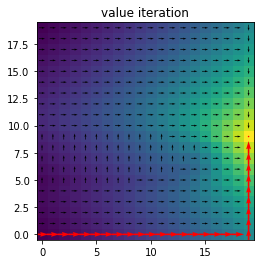

In [500]:

%load_ext autoreload
%autoreload 2

import os, sys, pdb, math, pickle, time

import matplotlib
import tensorflow as tf, numpy as np, matplotlib.pyplot as plt
from tqdm import tqdm

from utils import generate_problem, visualize_value_function, visualize_value_function_optimal_policy


def value_iteration(problem, reward, terminal_mask, gam):
    Ts = problem["Ts"]
    sdim, adim = Ts[0].shape[-1], len(Ts)  # state and action dimension
    V = tf.zeros([sdim])

    assert terminal_mask.ndim == 1 and reward.ndim == 2
    
    ######### Your code starts here #########
    Ts = tf.convert_to_tensor(Ts,dtype=tf.float32)
    mask = tf.cast(terminal_mask==0, dtype=tf.float32)
    reward = tf.transpose(reward, perm=[1,0])
    ######### Your code ends here ###########
    
    # perform value iteration
    for _ in range(1000):
        ######### Your code starts here #########
        # perform the value iteration update
        # V has shape [sdim]; sdim = n * n is the total number of grid state
        # Ts is a 4 element python list of transition matrices for 4 actions

        # reward has shape [sdim, 4] - represents the reward for each state
        # action pair

        # terminal_mask has shape [sdim] and has entries 1 for terminal states

        # compute the next value function estimate for the iteration
        # compute err = tf.linalg.norm(V_new - V_prev) as a breaking condition

        ######### Your code ends here ###########
        V_stack = tf.stack([V,V,V,V],-1)
        V_stack = tf.transpose(V_stack, perm=[1,0])
        V_prev = V
        
        V = tf.math.reduce_max(reward + tf.reshape(gam*(Ts@V_stack[:,:,None])*mask[None,:,None],[4,400]), axis=0)
        
        err = tf.linalg.norm(V-V_prev)
    
        if err < 1e-7:
            break

    return V


# value iteration ##############################################################
def main():
    # generate the problem
    problem = generate_problem()
    n = problem["n"]
    sdim, adim = n * n, 1

    # create the terminal mask vector
    terminal_mask = np.zeros([sdim])
    terminal_mask[problem["pos2idx"][19, 9]] = 1.0
    terminal_mask = tf.convert_to_tensor(terminal_mask, dtype=tf.float32)

    # generate the reward vector
    reward = np.zeros([sdim, 4])
    reward[problem["pos2idx"][19, 9], :] = 1.0
    reward = tf.convert_to_tensor(reward, dtype=tf.float32)

    gam = 0.95
    V_opt = value_iteration(problem, reward, terminal_mask, gam)

    plt.figure(213)
    visualize_value_function(np.array(V_opt).reshape((n, n)))
    plt.title("value iteration")
    plt.show()
    
    #plt.figure(213)
    #visualize_value_function_optimal_policy(np.array(V_opt).reshape((n, n)))
    #plt.title("optimal policy")
    #plt.show()


if __name__ == "__main__":
    main()



In [499]:
tf.random.categorical(tf.math.log([[1.0,1.0,1.0,4.0]]),1)

<tf.Tensor: shape=(1, 1), dtype=int64, numpy=array([[3]])>

In [482]:
logits = tf.random.categorical(tf.math.log([[1.0,1.0,1.0,4.0]]),5)
logits

<tf.Tensor: shape=(1, 5), dtype=int64, numpy=array([[3, 3, 3, 1, 3]])>

In [483]:
tf.one_hot(logits,5)

<tf.Tensor: shape=(1, 5, 5), dtype=float32, numpy=
array([[[0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.]]], dtype=float32)>

In [380]:
tf.math.log([[1., 1., 1., 1.],
                     [0., 1., 2., 3.]])

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[0.       , 0.       , 0.       , 0.       ],
       [     -inf, 0.       , 0.6931472, 1.0986123]], dtype=float32)>

In [289]:
from utils import generate_problem, visualize_value_function,make_transition_matrices
n = 20
m = n
sdim, adim = m * n, 4

# the parameters of the storm
x_eye, sig = np.array([15, 7]), 1e0

Ts, pos2idx, idx2pos = make_transition_matrices(m, n, x_eye, sig)

Ts = [tf.convert_to_tensor(T, dtype=tf.float32) for T in Ts]
#Problem = dict(Ts=Ts, n=n, m=m, pos2idx=pos2idx, idx2pos=idx2pos)

In [290]:
V = tf.zeros([sdim])

In [291]:
V_stack = tf.stack([V,V,V,V],-1)

In [292]:
V_stack

<tf.Tensor: shape=(400, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [293]:
Ts = tf.convert_to_tensor(Ts,dtype=tf.float32)

In [294]:
V_stack = tf.transpose(V_stack, perm=[1,0])

In [295]:
result = (Ts@V_stack[:,:,None])*mask[None,:,None]

In [301]:
reward = tf.transpose(reward, perm=[1,0])

In [302]:
tf.reshape(result,[4,400])+reward

<tf.Tensor: shape=(4, 400), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [303]:
tf.math.reduce_max(tf.reshape(result,[4,400])+reward, axis=0)

<tf.Tensor: shape=(400,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [220]:
mask = tf.cast(terminal_mask==0, dtype=tf.float32)

In [223]:
mask

<tf.Tensor: shape=(400,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [296]:
problem = generate_problem()
n = problem["n"]
sdim, adim = n * n, 1

In [297]:
# create the terminal mask vector
terminal_mask = np.zeros([sdim])
terminal_mask[problem["pos2idx"][19, 9]] = 1.0
terminal_mask = tf.convert_to_tensor(terminal_mask, dtype=tf.float32)

# generate the reward vector
reward = np.zeros([sdim, 4])
reward[problem["pos2idx"][19, 9], :] = 1.0
reward = tf.convert_to_tensor(reward, dtype=tf.float32)

In [298]:
terminal_mask

<tf.Tensor: shape=(400,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [299]:
reward

<tf.Tensor: shape=(400, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [300]:
V = tf.ones([sdim])

In [96]:
V*mask

<tf.Tensor: shape=(400,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [94]:
mask = tf.cast(terminal_mask==0, dtype=tf.float32)

In [95]:
mask

<tf.Tensor: shape=(400,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [502]:
tf.linalg.norm([1,1])

InvalidArgumentError: Value for attr 'T' of int32 is not in the list of allowed values: bfloat16, half, float, double, complex64, complex128
	; NodeDef: {{node Sqrt}}; Op<name=Sqrt; signature=x:T -> y:T; attr=T:type,allowed=[DT_BFLOAT16, DT_HALF, DT_FLOAT, DT_DOUBLE, DT_COMPLEX64, DT_COMPLEX128]> [Op:Sqrt]